# Minneapolis College Library Springshare Data Analysis
# LibGuides Views 
## William Vann
### 5/2023

In [1]:
# Import dependencies

from datetime import datetime as dt

import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Load libguide usage stats all-time (2014-present)

guides_df = pd.read_csv("guide_alltime.csv")
guides_df.head(10)

,Guide ID,Guide Name,2014-02,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,...,2022-09,2022-10,2022-11,2022-12,2023-01,2023-02,2023-03,2023-04,2023-05,Total
0,124892,A Master Guide to Guides,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,98118,A Master Library Content Guide,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,98116,A Master Search Box Guide,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,98123,A Master Subscription Resources Guide,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,98119,A Template - The Works,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,655293,A Template - Two Column Layout,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,98157,AMIS 1350: American Indian Education Past & Pr...,0,3,2,8,1,1,10,2,...,1,9,2,0,1,0,8,0,0,434
7,98161,ARTS 1125: Ceramics 1,0,39,74,9,4,1,2,6,...,0,3,0,0,0,0,0,0,0,398
8,98158,ARTS 1142: Painting 1,0,0,1,0,1,0,4,1,...,0,0,0,0,0,0,0,0,0,105
9,1207610,ARTS 1150 Digital Imaging Foundations,0,0,0,0,0,0,0,0,...,7,7,0,0,0,0,0,0,0,33


In [3]:
# Get basic info on this dataset

guides_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Columns: 115 entries, Guide ID to Total
dtypes: int64(114), object(1)
memory usage: 169.0+ KB


In [4]:
# Checking for null values in Total column

guides_df["Total"].isna().sum()

0

In [5]:
# Summary stats for Total column

guides_df["Total"].describe()

count      188.000000
mean      1237.622340
std       6918.144398
min          0.000000
25%         33.750000
50%        161.500000
75%        606.000000
max      88318.000000
Name: Total, dtype: float64

In [6]:
# Looking for dummy guides to weed out of our analysis

guides_df["Guide Name"].value_counts()

Guide Name
[Deleted]                                                             50
PHIL 1115: Introduction to Philosophy                                  2
ENGL 1111: College English 2 - Research and Composition for Change     2
Mental Health                                                          1
Literature                                                             1
                                                                      ..
Current Events                                                         1
Culturally Responsive/Anti-Racist Pedagogy                             1
Critical Viewing: The Depths of Horror                                 1
Creative Commons & Copyright                                           1
Fake News &amp; Misinformation:                                        1
Name: count, Length: 137, dtype: int64

In [7]:
# Shrink feature dimensions down to 3 most important 

guides_df = guides_df[["Guide ID", "Guide Name", "Total"]]

# Remove dummy libguides

guides_df = guides_df.loc[(guides_df["Guide Name"] != "[Deleted]") & 
                          ~(guides_df["Guide Name"].str.contains("Master")) & 
                          ~(guides_df["Guide Name"].str.contains("Template")) &
                          ~(guides_df["Guide Name"].str.contains("TEST")), :]

guides_df = guides_df.sort_values(by="Total", ascending=False)
guides_df = guides_df.reset_index(drop=True)

guides_df

,Guide ID,Guide Name,Total
0,1064692,Find Resources,88318
1,471526,Citation Help,31714
2,98122,Nursing,10900
3,163756,NPRO 1000/1010: Introduction to Health Concepts,9575
4,138408,ENGL 1111: College English 2 - Focus on Gender,9125
...,...,...,...
125,407370,Geology,0
126,842076,Prince,0
127,98178,READ 1300: Critical Reading of Academic Texts ...,0
128,133371,PHIL 1115: Introduction to Philosophy,0


In [8]:
# Visualize total views > 500

over_500_views_df = guides_df.loc[(guides_df["Total"] > 500), :]
over_500_views_df

,Guide ID,Guide Name,Total
0,1064692,Find Resources,88318
1,471526,Citation Help,31714
2,98122,Nursing,10900
3,163756,NPRO 1000/1010: Introduction to Health Concepts,9575
4,138408,ENGL 1111: College English 2 - Focus on Gender,9125
5,214276,NPRO 1100: Wellness-Illness Concepts Across th...,5669
6,98124,Alternative Media,3985
7,98147,English (Writing),3187
8,1082522,Research 101,2699
9,972293,ENGL 1111: College English 2 - Research and Co...,2372


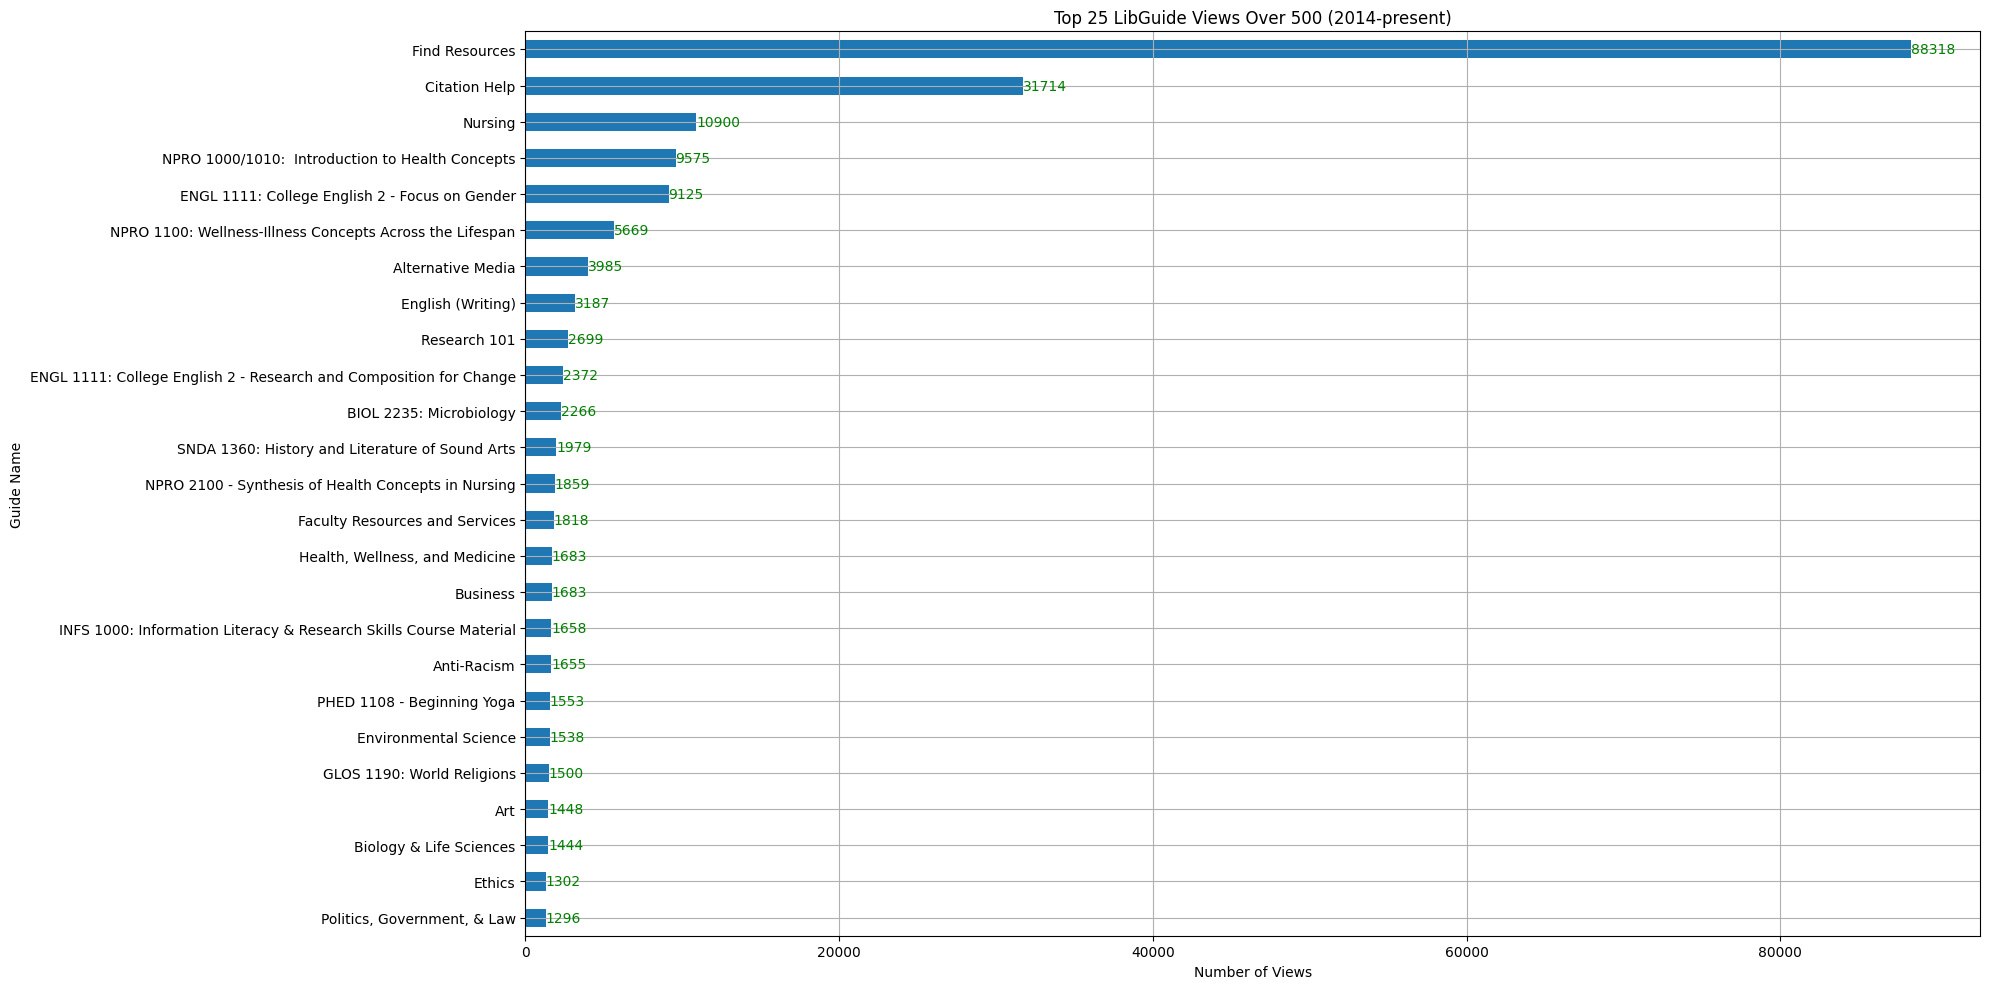

In [9]:
# Visualize top 25 libguides > 500 views by # of views 

num_to_view = 25

ax = over_500_views_df.head(num_to_view).plot(
        x="Guide Name", 
        y="Total", 
        figsize=(20,10),
        kind="barh", 
        legend=False,
        grid=True, 
        xlabel="Number of Views",
        title=f"Top {num_to_view} LibGuide Views Over 500 (2014-present)")

ax.bar_label(ax.containers[0], color="green")
ax.invert_yaxis()
plt.tight_layout()

plt.savefig("LibGuides/guides_gt_500.png")

plt.show()

In [10]:
# Visualize total views <= 500

under_500_views_df = guides_df.loc[(guides_df["Total"] <= 500), :]
under_500_views_df

,Guide ID,Guide Name,Total
49,585491,PHIL 1171: Ethics,492
50,864366,Mental Health,473
51,98157,AMIS 1350: American Indian Education Past & Pr...,434
52,98165,CMST 1000: Introduction to Communication Studies,431
53,98148,Elections,417
...,...,...,...
125,407370,Geology,0
126,842076,Prince,0
127,98178,READ 1300: Critical Reading of Academic Texts ...,0
128,133371,PHIL 1115: Introduction to Philosophy,0


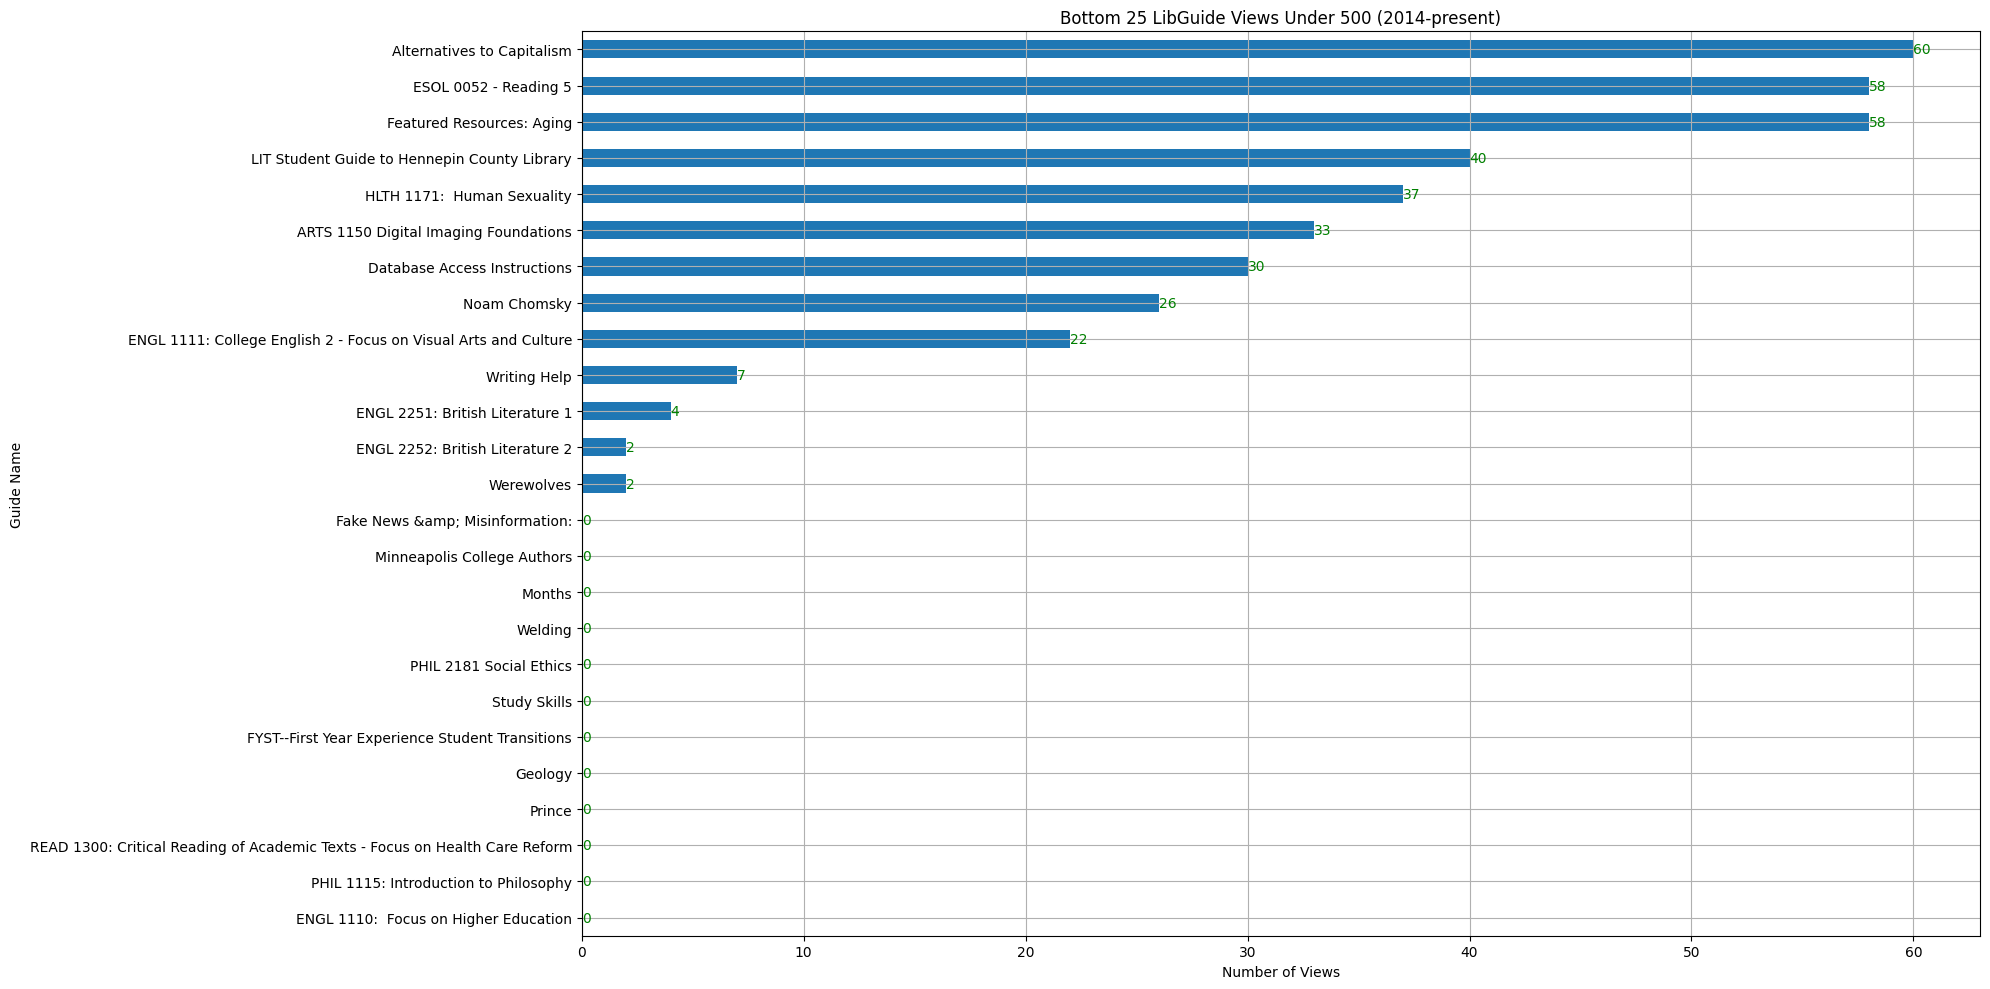

In [11]:
# Visualize top 25 libguides < 500 views by # of views 

num_to_view = 25

ax = under_500_views_df.tail(num_to_view).plot(
        x="Guide Name", 
        y="Total", 
        figsize=(20,10),
        kind="barh", 
        legend=False,
        grid=True, 
        xlabel="Number of Views",
        title=f"Bottom {num_to_view} LibGuide Views Under 500 (2014-present)")

ax.bar_label(ax.containers[0], color="green")
ax.invert_yaxis()
plt.tight_layout()

plt.savefig("LibGuides/guides_lt_500.png")

plt.show()

In [12]:
# Make dataframe of all time top leaders by # of views

num_of_top_leaders = 25

leaders_guides = guides_df[["Guide Name", "Total"]].sort_values(by="Total", ascending=False).head(num_of_top_leaders)
leaders_guides = leaders_guides.reset_index(drop=True)
leaders_guides = leaders_guides.sort_values(by="Total", ascending=True)
leaders_guides

,Guide Name,Total
24,"Politics, Government, & Law",1296
23,Ethics,1302
22,Biology & Life Sciences,1444
21,Art,1448
20,GLOS 1190: World Religions,1500
19,Environmental Science,1538
18,PHED 1108 - Beginning Yoga,1553
17,Anti-Racism,1655
16,INFS 1000: Information Literacy & Research Ski...,1658
15,Business,1683


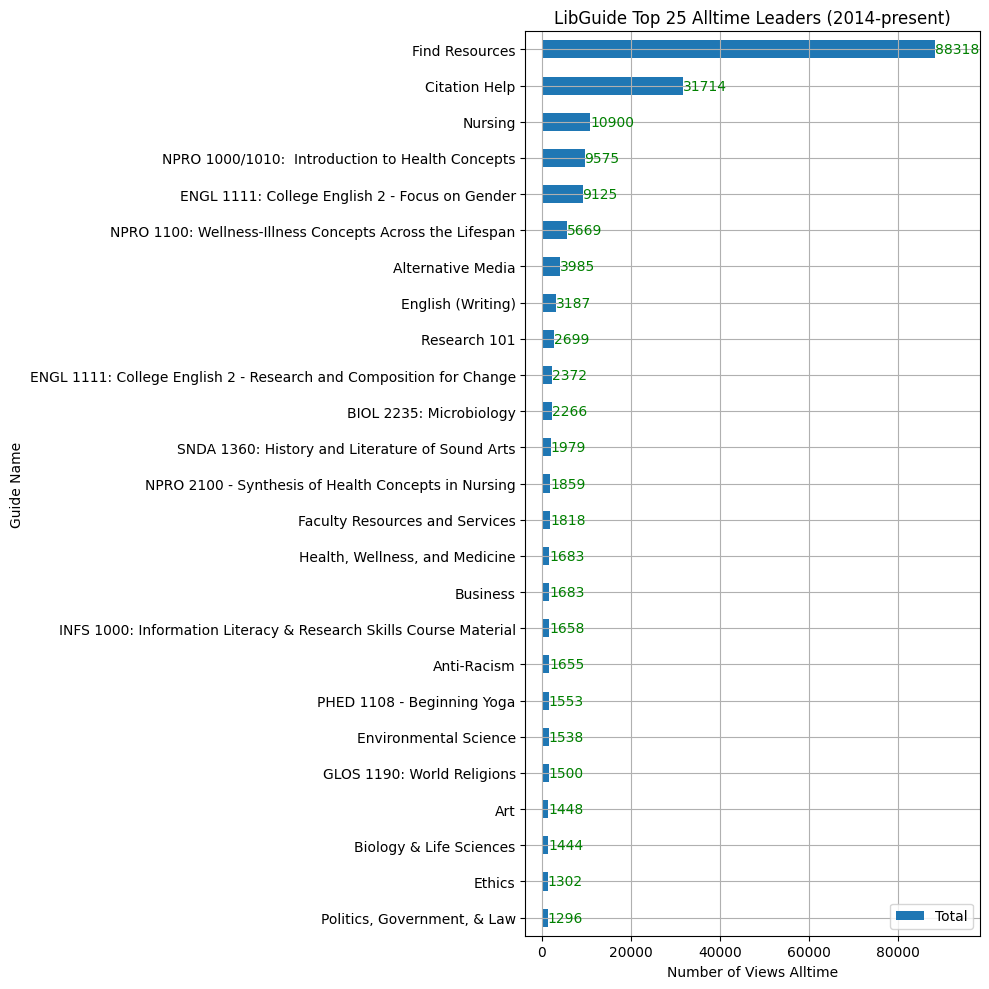

In [13]:
# Visualize the leaders' total views 

ax = leaders_guides.plot(
        x="Guide Name", 
        y="Total", 
        figsize=(10,10),
        kind="barh", 
        grid=True, 
        xlim=[leaders_guides["Total"].min()-5000, leaders_guides["Total"].max()+10000],
        xlabel="Number of Views Alltime",
        title=f"LibGuide Top {num_of_top_leaders} Alltime Leaders (2014-present)")

ax.bar_label(ax.containers[0], color="green")
plt.tight_layout()

plt.savefig("LibGuides/guides_leaders.png")

plt.show()

In [14]:
# Make dataframe of all time top laggards by # of views

num_of_top_laggards = 25

laggards_guides = guides_df[["Guide Name", "Total"]].sort_values(by="Total", ascending=True).head(num_of_top_laggards)
laggards_guides = laggards_guides.reset_index(drop=True)
laggards_guides = laggards_guides.sort_values(by="Total", ascending=True)
laggards_guides

,Guide Name,Total
0,ENGL 1110: Focus on Higher Education,0
1,Fake News &amp; Misinformation:,0
2,Minneapolis College Authors,0
3,Months,0
4,Welding,0
5,PHIL 2181 Social Ethics,0
6,PHIL 1115: Introduction to Philosophy,0
7,FYST--First Year Experience Student Transitions,0
8,READ 1300: Critical Reading of Academic Texts ...,0
9,Study Skills,0


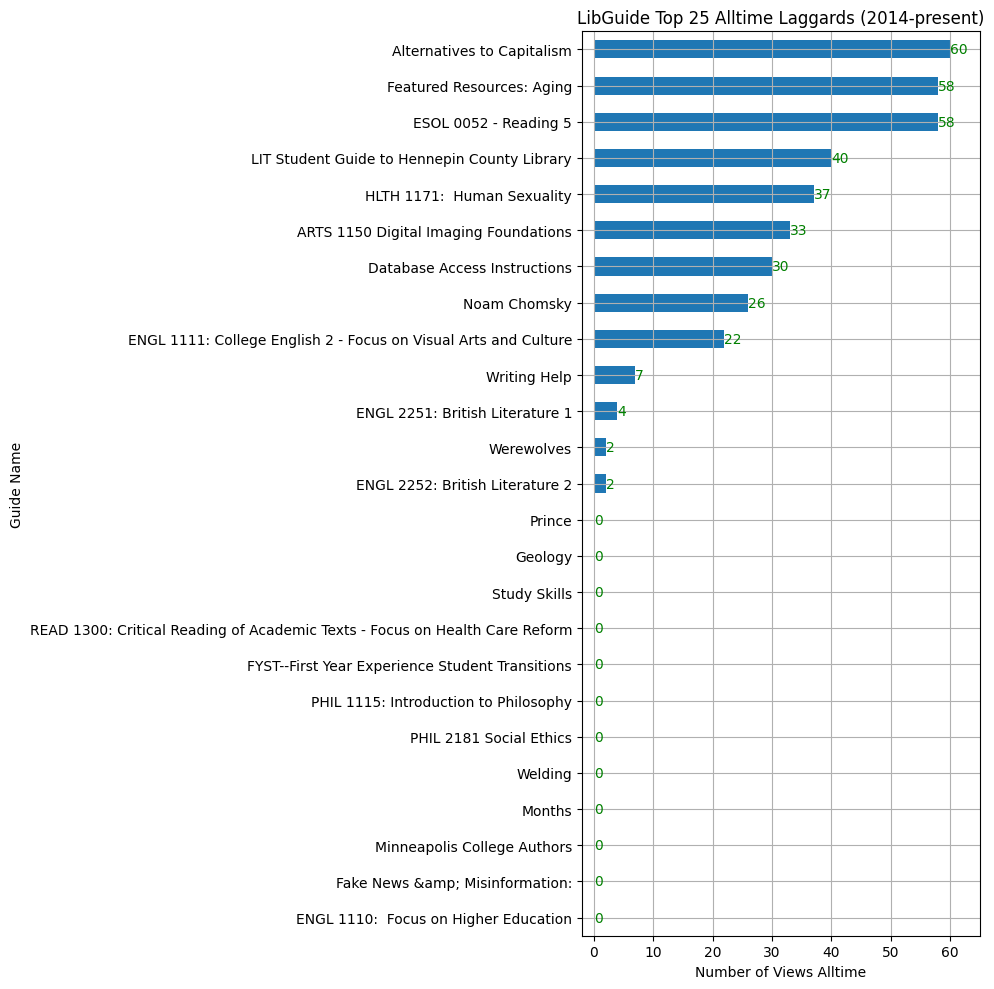

In [15]:
# Visualize the laggards' total views 

ax = laggards_guides.plot(
        x="Guide Name", 
        y="Total", 
        figsize=(10,10),
        kind="barh", 
        legend=False,
        grid=True, 
        xlim=[laggards_guides["Total"].min()-2, laggards_guides["Total"].max()+5],
        xlabel="Number of Views Alltime",
        title=f"LibGuide Top {num_of_top_laggards} Alltime Laggards (2014-present)")

ax.bar_label(ax.containers[0], color="green")
plt.tight_layout()

plt.savefig("LibGuides/guides_laggards.png")

plt.show()

# Inferences

In [16]:
# Deeper dive into > 500 views LibGuides

over_500_views_df

,Guide ID,Guide Name,Total
0,1064692,Find Resources,88318
1,471526,Citation Help,31714
2,98122,Nursing,10900
3,163756,NPRO 1000/1010: Introduction to Health Concepts,9575
4,138408,ENGL 1111: College English 2 - Focus on Gender,9125
5,214276,NPRO 1100: Wellness-Illness Concepts Across th...,5669
6,98124,Alternative Media,3985
7,98147,English (Writing),3187
8,1082522,Research 101,2699
9,972293,ENGL 1111: College English 2 - Research and Co...,2372


In [17]:
# List of mctc course designators

course_designators = [
    "ACCT", "COUN", "ACMT", "AMIS", "AMSL", "AMST", "ANTH", "APRL", "ARAB", "ARCH", "ARTS", "ASTR",
    "BIKE", "BIOL", "BUSN", 
    "CSIP", "CHEM", "CINE", "CIST", "CMST", "CSCI",
    "DAKO", "DNTA",
    "ECED", "ECON", "EDUC", "ENGA", "ESOL", "ENCW", "ENLT", "ENGL",
    "FYST",
    "GEOG", "GEOL", "GLOS", "GRPH",
    "HLTH", "HCCC", "HVAC", "HERB", "HIST", "HONR", "HSER",
    "INFS", "ITEC",
    "JAPN",
    "LAWE", "LIBT",
    "MTTC", "MATH", "MEDS", "MUSC", 
    "NAHA", "NPRO", 
    "OJIB",
    "PHRM", "PHIL", "PHOT", "PHMO", "PHED", "PHYS", "PSCI", "PSOM", "PSYC",
    "READ", 
    "SOCI", "SOMI", "SNDA", "SPAN", "STSK", "SSAC", 
    "THTR", 
    "WEBI", "WELD", "WGSS"
]

In [18]:
# Examine guide names for course designators

first_words = (over_500_views_df["Guide Name"].str.split(" ").str[0])

first_words.info()

<class 'pandas.core.series.Series'>
Index: 49 entries, 0 to 48
Series name: Guide Name
Non-Null Count  Dtype 
--------------  ----- 
49 non-null     object
dtypes: object(1)
memory usage: 784.0+ bytes


In [19]:
# Create boolean mask to find libguides devoted to courses by course designator

course_guides_mask = first_words.isin(course_designators)

top_ten_course_libguides = over_500_views_df.head(25).loc[(course_guides_mask), :]
top_ten_course_libguides

,Guide ID,Guide Name,Total
3,163756,NPRO 1000/1010: Introduction to Health Concepts,9575
4,138408,ENGL 1111: College English 2 - Focus on Gender,9125
5,214276,NPRO 1100: Wellness-Illness Concepts Across th...,5669
9,972293,ENGL 1111: College English 2 - Research and Co...,2372
10,98163,BIOL 2235: Microbiology,2266
11,98155,SNDA 1360: History and Literature of Sound Arts,1979
12,227917,NPRO 2100 - Synthesis of Health Concepts in Nu...,1859
16,416540,INFS 1000: Information Literacy & Research Ski...,1658
18,603210,PHED 1108 - Beginning Yoga,1553
20,137438,GLOS 1190: World Religions,1500


In [20]:
# Calculate percentage of total views for each course designator and add to dataframe

total_views = top_ten_course_libguides["Total"].sum()

top_ten_course_libguides["Percent of Total"] = round((top_ten_course_libguides["Total"] / total_views) * 100, 2)
top_ten_course_libguides

,Guide ID,Guide Name,Total,Percent of Total
3,163756,NPRO 1000/1010: Introduction to Health Concepts,9575,25.50
4,138408,ENGL 1111: College English 2 - Focus on Gender,9125,24.30
5,214276,NPRO 1100: Wellness-Illness Concepts Across th...,5669,15.09
9,972293,ENGL 1111: College English 2 - Research and Co...,2372,6.32
10,98163,BIOL 2235: Microbiology,2266,6.03
11,98155,SNDA 1360: History and Literature of Sound Arts,1979,5.27
12,227917,NPRO 2100 - Synthesis of Health Concepts in Nu...,1859,4.95
16,416540,INFS 1000: Information Literacy & Research Ski...,1658,4.41
18,603210,PHED 1108 - Beginning Yoga,1553,4.14
20,137438,GLOS 1190: World Religions,1500,3.99


In [21]:
# Function to aggregate %'s

def calculate_percentage(designator):
    
    return round(top_ten_course_libguides.loc[ \
        (top_ten_course_libguides["Guide Name"].str.contains(f"{designator}")), :] \
        ["Percent of Total"].sum(), 2)

In [22]:
# Sanity checks

counter = 0

for designator in course_designators:
    percentage = calculate_percentage(designator)
    print(f"{designator} = {percentage} %")
    counter += percentage
    
assert counter <= 100, "expected <= 100 for counter"

print(f"\nTotal = {counter} %")

ACCT = 0.0 %
COUN = 0.0 %
ACMT = 0.0 %
AMIS = 0.0 %
AMSL = 0.0 %
AMST = 0.0 %
ANTH = 0.0 %
APRL = 0.0 %
ARAB = 0.0 %
ARCH = 0.0 %
ARTS = 0.0 %
ASTR = 0.0 %
BIKE = 0.0 %
BIOL = 6.03 %
BUSN = 0.0 %
CSIP = 0.0 %
CHEM = 0.0 %
CINE = 0.0 %
CIST = 0.0 %
CMST = 0.0 %
CSCI = 0.0 %
DAKO = 0.0 %
DNTA = 0.0 %
ECED = 0.0 %
ECON = 0.0 %
EDUC = 0.0 %
ENGA = 0.0 %
ESOL = 0.0 %
ENCW = 0.0 %
ENLT = 0.0 %
ENGL = 30.62 %
FYST = 0.0 %
GEOG = 0.0 %
GEOL = 0.0 %
GLOS = 3.99 %
GRPH = 0.0 %
HLTH = 0.0 %
HCCC = 0.0 %
HVAC = 0.0 %
HERB = 0.0 %
HIST = 0.0 %
HONR = 0.0 %
HSER = 0.0 %
INFS = 4.41 %
ITEC = 0.0 %
JAPN = 0.0 %
LAWE = 0.0 %
LIBT = 0.0 %
MTTC = 0.0 %
MATH = 0.0 %
MEDS = 0.0 %
MUSC = 0.0 %
NAHA = 0.0 %
NPRO = 45.54 %
OJIB = 0.0 %
PHRM = 0.0 %
PHIL = 0.0 %
PHOT = 0.0 %
PHMO = 0.0 %
PHED = 4.14 %
PHYS = 0.0 %
PSCI = 0.0 %
PSOM = 0.0 %
PSYC = 0.0 %
READ = 0.0 %
SOCI = 0.0 %
SOMI = 0.0 %
SNDA = 5.27 %
SPAN = 0.0 %
STSK = 0.0 %
SSAC = 0.0 %
THTR = 0.0 %
WEBI = 0.0 %
WELD = 0.0 %
WGSS = 0.0 %

Total = 100.0 %

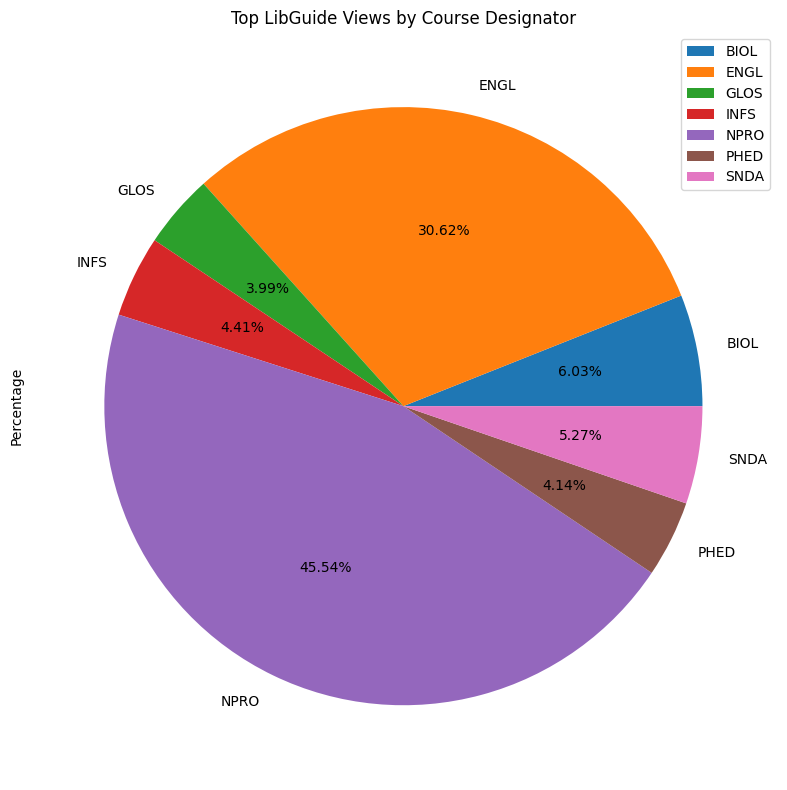

In [23]:
# Render pie chart

pie_df = pd.DataFrame(columns=["Percentage"], index=course_designators)

pie_df["Percentage"] = [calculate_percentage(designator) for designator in course_designators]

pie_plot = pie_df.loc[(pie_df["Percentage"] > 0), :].plot.pie(y="Percentage", title="Top LibGuide Views by Course Designator", \
                                                   figsize=(8,8), autopct="%1.2f%%").get_figure()

plt.tight_layout()

pie_plot.savefig("LibGuides/course_guides_pie.png")